# 05.03 - Standard Model Workflow

## Load the Data

To start with our PyTorch model, we first need to load our data. In this case, we're using a dataset called `College.csv`. We can use the `pandas` library to load our dataset as follows:

In [1]:
# Import the pandas library as pd.
import pandas as pd

# Use the read_csv function of pandas to load the dataset.
# The read_csv function takes the file path as an argument.
# Here, './College.csv' is the relative path to the dataset file.
df = pd.read_csv('./College.csv')

# The dataset has an unnamed column that actually represents the university names.
# We rename this column to 'University' using the rename function of pandas DataFrame.
# The rename function takes a dictionary as an argument where the keys are the old column names
# and the values are the new column names.
# The `inplace=True` argument means that the changes are made directly to the original DataFrame.
df.rename(columns={'Unnamed: 0': 'University'}, inplace=True)

# The head function shows the first 5 rows of the DataFrame.
# This is used to quickly test if your dataset has been loaded correctly.
df.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Data Cleaning: Initial Check

Before we start building our PyTorch model, it's important to ensure that our data is clean and ready for processing. We should begin by checking for any null values and verifying the data type of our numerical columns.

In [2]:
# Check for null values in the DataFrame
# The isnull() function of pandas DataFrame returns a DataFrame where each cell is either True or False depending on whether that cell's value is null or not, respectively.
# The sum() function is then used to count the number of True values (i.e., nulls) in each column.
# Therefore, df.isnull().sum() returns a pandas Series where the index is the column names and the value is the number of nulls in each column.
df.isnull().sum()

University     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [3]:
# Check the data types of each column in the DataFrame
# The dtypes attribute of pandas DataFrame returns a pandas Series where the index is the column names and the value is the data type of each column.
# This is useful to ensure that all the columns are of the expected data type.
# For example, numerical columns should be either int or float data type, and categorical columns should be object (i.e., string) data type.
df.dtypes

University      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD             object
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

## Data Cleaning: Clean up `PhD` column

The `PhD` column in our dataset is currently being interpreted as a string type because it contains non-numerical values. To ensure we can perform numerical operations on this column, it's crucial to clean it up. We need to replace any non-numerical values with `NaN` (which stands for "Not a Number") and then convert the column data type to float. Here is how we can do this with pandas:

In [4]:
# We are going to clean up the `PhD` column in our DataFrame (df).
# The `PhD` column currently contains some '?' values, which represent missing or unknown data.
# However, the presence of these non-numerical values is causing the entire column to be interpreted as a string data type.
# This is a problem because we want to perform numerical operations on this column.

# Therefore, we need to replace these '?' values with 'np.nan', which stands for 'Not a Number' and is the standard missing data marker used in pandas.
# In addition to replacing '?', we also need to convert the other values in the column to float data type.
# This is because these values are currently strings, and we want them to be floats so that we can perform numerical operations on them.

# To achieve this, we use the 'map' function of pandas Series.
# The 'map' function applies a function to each value in the Series.
# In our case, the function is a lambda function defined as 'lambda phd: np.nan if phd == '?' else float(phd)'.
# This function takes as input a value (phd) and returns np.nan if the value is '?', otherwise it returns the value converted to float.

# Therefore, 'df.PhD.map(lambda phd: np.nan if phd == '?' else float(phd))' gives us a pandas Series where each value is either np.nan (if the original value was '?') or a float (if the original value was not '?').

# We assign this Series back to the 'PhD' column in the DataFrame, thus modifying the original DataFrame.

import numpy as np
df.PhD = df.PhD.map(lambda phd: np.nan if phd == '?' else float(phd))  # Expected return type: None

In [5]:
# Now that we have cleaned up our data, it's important to check the data types of each column once again.
# We'll use the dtypes attribute of the pandas DataFrame, which returns a pandas Series.
# In this Series, the index is the column names and the value is the data type of each column.

# This is crucial to ensure that all the columns are of the expected data type after our data cleaning.
# For example, we expect the 'PhD' column to be of float data type after replacing '?' values with 'np.nan' and converting the other values to float.

# We simply need to call the dtypes attribute on our DataFrame as follows:

df.dtypes

# The output will be a pandas Series where each index-value pair represents a column name and its data type, respectively.
# We should check that the 'PhD' column is of float data type.

University      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD            float64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [6]:
# Now, we want to check if there are any null values in our DataFrame.
# Null values are missing values that are often represented as 'NaN' (Not a Number) in pandas.
# These null values can cause issues when we try to build our PyTorch model, as the model cannot handle null values.

# To check for null values, we use the isnull() function of pandas DataFrame.
# The isnull() function returns a DataFrame where each cell is either True or False depending on whether that cell's value is null or not, respectively.

# However, it can be difficult to manually check each cell in the returned DataFrame, especially when the DataFrame is large.
# Therefore, we use the sum() function to count the number of True values (i.e., nulls) in each column.
# The sum() function works because pandas treats True as 1 and False as 0.

# Therefore, df.isnull().sum() returns a pandas Series where the index is the column names and the value is the number of nulls in each column.
# We can then easily see which columns contain null values and how many nulls there are in each column.

# The following line of code performs this operation and displays the result.
df.isnull().sum()

University      0
Private         0
Apps            0
Accept          0
Enroll          0
Top10perc       0
Top25perc       0
F.Undergrad     0
P.Undergrad     0
Outstate        0
Room.Board      0
Books           0
Personal        0
PhD            29
Terminal        0
S.F.Ratio       0
perc.alumni     0
Expend          0
Grad.Rate       0
dtype: int64

## Data Cleaning: Drop `NaN`'s

Now that we've identified the presence of `NaN` values in our data, we need to handle these missing values before we can proceed with building our PyTorch model. For the purposes of this exercise, since the nulls represent a small percentage of our data, we will simply drop these rows.

In [7]:
# Now, we can check the shape of our DataFrame.
# The shape attribute of the pandas DataFrame returns a tuple representing the dimensions of the DataFrame.
# The first element of the tuple is the number of rows, and the second element is the number of columns.
# This is useful to understand the size of our DataFrame, i.e., how many data points (rows) and features (columns) we have.
# It can also be used as a sanity check to ensure that our data cleaning did not unintentionally remove or add any rows or columns.
# We simply need to call the shape attribute on our DataFrame as follows:

df.shape

# The output will be a tuple where the first element is the number of rows and the second element is the number of columns.
# We can interpret this as "We have 'x' data points with 'y' features each", where 'x' is the first element of the tuple, and 'y' is the second element of the tuple.

(777, 19)

In [8]:
# Now that we've identified the presence of NaN values in our dataframe, it's important to handle these missing values.
# NaN values, which stand for 'Not a Number', represent missing or null data in the dataframe.
# Our PyTorch model won't be able to handle these NaN values, so we need to deal with them before we can build our model.

# There are many strategies to handle missing data, and the best strategy depends on the nature of our data and the specific situation.
# In our case, we've decided to simply remove the rows with missing data.
# This is a reasonable strategy because the missing data represents a small portion of our dataset.

# We can use the 'dropna' function of pandas dataframe to remove these rows.
# The 'dropna' function removes rows with NaN values and returns a new dataframe.
# By passing the argument 'inplace=True', we modify the original dataframe directly, without creating a new dataframe.

df.dropna(inplace=True)  # Expected return type: None

# After handling the missing data, it's important to check the shape of our dataframe.
# The 'shape' attribute of pandas dataframe provides the dimensions of the dataframe, i.e., the number of rows (data points) and columns (features).
# This can help us understand the size of our dataframe and ensure that our data cleaning operations (such as dropping rows) have been carried out correctly.

# We can access the 'shape' attribute as follows:

df.shape  # Expected return type: tuple

# The output will be a tuple where the first element is the number of rows and the second element is the number of columns.
# We can interpret this as "We have 'x' data points with 'y' features each", where 'x' is the first element of the tuple and 'y' is the second element of the tuple.

(748, 19)

## Feature Engineering: Binarize `'Private'` column

In our dataset, the `Private` column contains categorical data, i.e., 'Yes' and 'No' values indicating whether a university is private or not. However, our PyTorch model will need numerical data to work with. Therefore, we need to convert these categorical values into numerical values, a process known as binarization.

In [9]:
# Now, we want to check the distribution of values in the 'Private' column.
# The 'Private' column in our DataFrame (df) is a binary categorical column that represents whether a university is private or not.
# It contains 'Yes' and 'No' values, where 'Yes' means the university is private, and 'No' means the university is not private.

# However, before we binarize this column (i.e., replace 'Yes' with 1 and 'No' with 0), it's useful to check how many 'Yes' and 'No' values there are.
# This can help us understand the distribution of private and non-private universities in our dataset.

# The 'value_counts' function of pandas Series is used for this purpose.
# The function returns a pandas Series where the index is the unique values in the original Series, and the value is the count of each unique value.
# Therefore, df['Private'].value_counts() returns a pandas Series where the index is ['Yes', 'No'], and the value is the count of 'Yes' and 'No' in the 'Private' column.

df['Private'].value_counts()  # Expected return type: pandas.Series

# The output will be a pandas Series where each index-value pair represents a unique value in the 'Private' column and its count, respectively.
# We can interpret this as "There are 'x' private universities and 'y' non-private universities", where 'x' is the count of 'Yes', and 'y' is the count of 'No'.

Private
Yes    544
No     204
Name: count, dtype: int64

In [10]:
# Now that we have checked the distribution of 'Yes' and 'No' in the 'Private' column, we can proceed to binarize this column.
# Binarization is the process of converting a categorical column into a numerical column.
# In this case, we replace 'Yes' with 1 and 'No' with 0 in the 'Private' column.
# This way, our PyTorch model can handle the 'Private' column because the model needs numerical data.

# We use the 'map' function of pandas Series to apply a function to each value in the 'Private' column.
# This function is a dictionary where the keys are the old values ('Yes' and 'No') and the values are the new values (1 and 0).

# The 'map' function returns a new pandas Series where each value is either 1 or 0 depending on whether the original value was 'Yes' or 'No', respectively.
# We assign this new Series to the 'Private' column in the DataFrame, thus modifying the original DataFrame.

# The following line of code performs this operation:

df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})  # Expected return type: None

# After binarizing the 'Private' column, it's crucial to check the distribution of 1 and 0 in the 'Private' column.
# This is to ensure that the binarization was performed correctly.
# We can use the 'value_counts' function again for this purpose.

# df['Private'].value_counts()  # Expected return type: pandas.Series

# The output will be a pandas Series where each index-value pair represents a unique value in the 'Private' column and its count, respectively.
# We can interpret this as "There are 'x' private universities and 'y' non-private universities", where 'x' is the count of 1, and 'y' is the count of 0.

## Feature Engineering: Create an `Elite` column

The `Top10perc` column in our dataset represents the percentage of enrolled students who graduated high school in the top 10th percentile. To further enhance our understanding of the data, we can create a new column named `Elite`. This column will indicate whether a significant portion (50% or more) of the students enrolled at the university were in the top 10th percentile of their high school graduating class.

To create this new `Elite` column, we can apply a function to the `Top10perc` column that assigns a 1 if the `Top10perc` value is greater than or equal to 50, and a 0 otherwise. Here's how we can do this using pandas:

In [11]:
# Now, we want to create a new column in our DataFrame, called 'Elite'.
# This column will be a binary column (containing only 0s and 1s), representing whether a significant portion (50% or more) of the students enrolled at the university were in the top 10th percentile of their high school graduating class.

# To create the 'Elite' column, we apply a condition to the 'Top10perc' column.
# The condition is 'df.Top10perc > 50', which checks whether the 'Top10perc' value is greater than 50 for each row in the DataFrame.
# The result is a pandas Series where each value is either True (if the condition is met) or False (if the condition is not met).

# However, we want our 'Elite' column to be a binary column of 0s and 1s, not Trues and Falses.
# Therefore, we convert the True/False values to 1/0 values using the 'astype' function of pandas Series.
# The 'astype' function takes as input a data type (in this case, 'int') and converts the Series values to this data type.
# Therefore, '(df.Top10perc > 50).astype(int)' is a pandas Series where each value is either 1 (if 'Top10perc' is greater than 50) or 0 (if 'Top10perc' is not greater than 50).

# Finally, we assign this Series to a new column 'Elite' in the DataFrame, thus creating the 'Elite' column.

# The following line of code performs this operation:

df['Elite'] = (df.Top10perc > 50).astype(int)  # Expected return type: None

# After creating the 'Elite' column, it's crucial to check the distribution of 1 and 0 in this column.
# This is to ensure that the 'Elite' column was created correctly.
# We can use the 'value_counts' function for this purpose.

# df['Elite'].value_counts()  # Expected return type: pandas.Series

# The output will be a pandas Series where each index-value pair represents a unique value in the 'Elite' column and its count, respectively.
# We can interpret this as "There are 'x' elite universities and 'y' non-elite universities", where 'x' is the count of 1, and 'y' is the count of 0.

## EDA: Plot a Heatmap of the Correlation Matrix

Heatmaps are a powerful tool for visually examining the correlation structure of your predictors. A correlation matrix, which is a table showing correlation coefficients between variables, can be transformed into a heatmap where different colors signify different levels of correlation.

<Axes: >

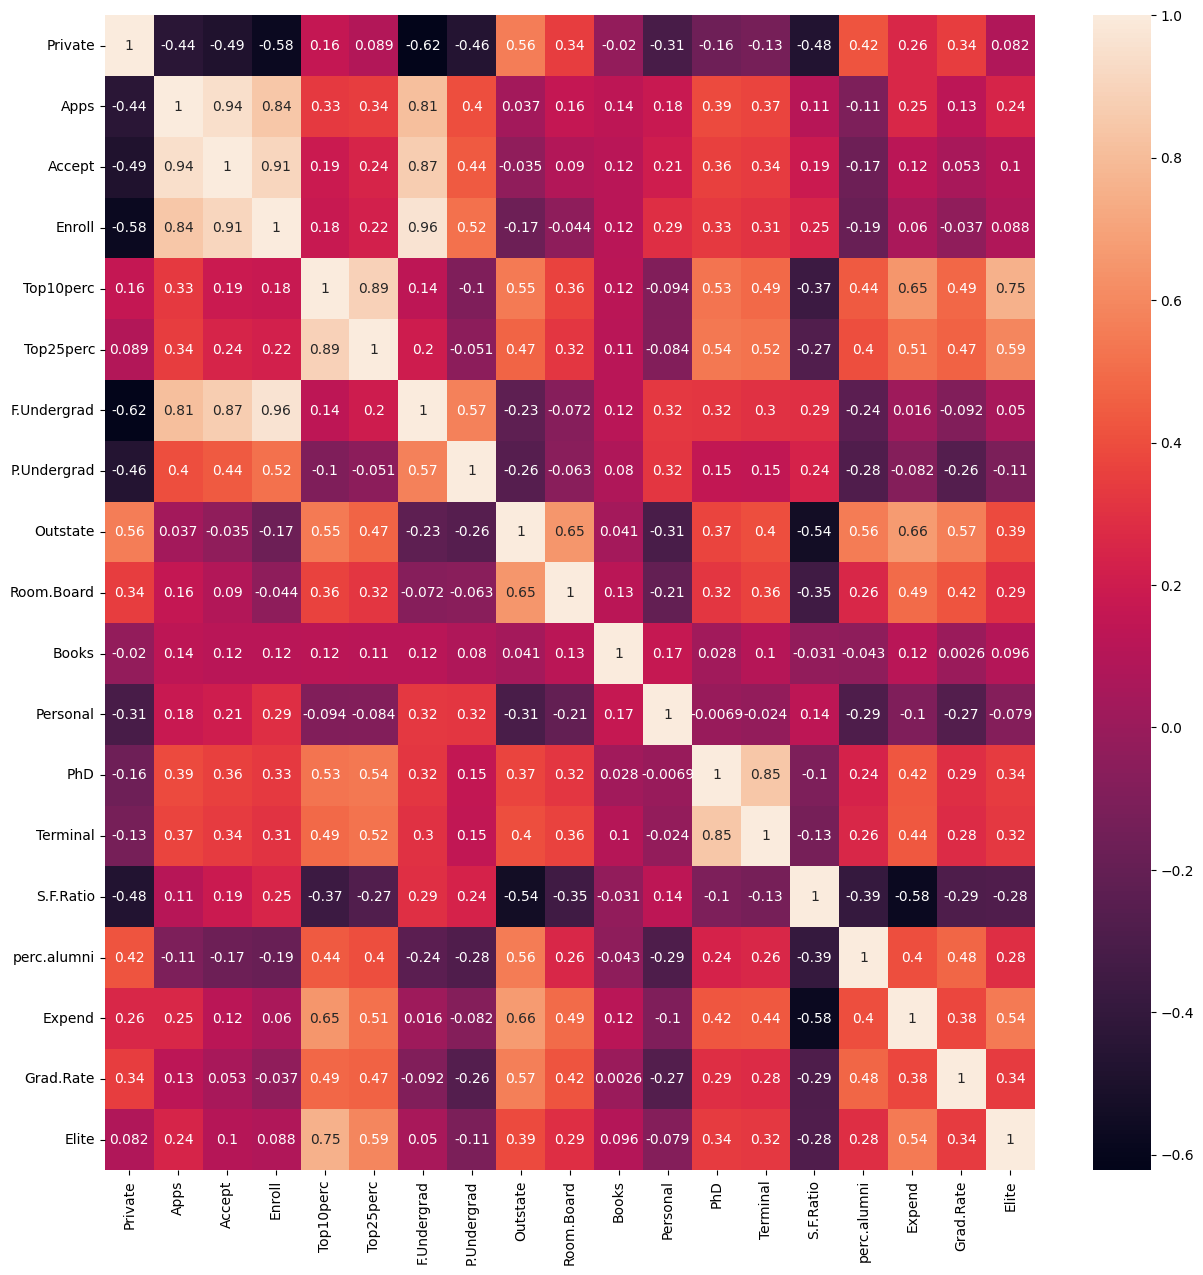

In [12]:
# We will plot a heatmap of the correlation matrix of our DataFrame.
# A heatmap is a graphical representation of data where individual values contained in a matrix are represented as colors.
# A correlation matrix is a table showing the value of the correlation coefficient (Correlation coefficients are used in statistics to measure how strong a relationship is between two variables) between sets of variables.
# Each attribute of the dataset is compared with the other attributes to find out the correlation coefficient.
# This enables us to see which pairs have the highest correlation, the pairs which are highly correlated represent the same variance to the model.

# We use the seaborn library to plot the heatmap.
# Seaborn is a Python data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

# We first need to create a figure using matplotlib's 'figure' function.
# The 'figure' function takes as input the figure size, which is a tuple representing the width and height of the figure in inches.
# We want our figure to be 15x15 inches, so we pass (15,15) as the argument to the 'figure' function.
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))  # Expected return type: matplotlib.figure.Figure

# Now that we have our figure, we can plot the heatmap using seaborn's 'heatmap' function.
# The 'heatmap' function takes as input the data to be plotted, which should be a 2D dataset.
# In our case, the data is the correlation matrix of our DataFrame, which we can obtain using the 'corr' function of pandas DataFrame.
# The 'corr' function calculates the pairwise correlation of columns, excluding NA/null values.
# Therefore, 'df.corr()' gives us a 2D dataset where each cell represents the correlation coefficient between a pair of columns.

# We also want to annotate our heatmap with the correlation coefficients.
# The 'annot' argument of the 'heatmap' function controls whether or not the correlation coefficients are written on the heatmap.
# We want to have the correlation coefficients on the heatmap, so we pass 'True' as the 'annot' argument.

import seaborn as sns
sns.heatmap(df[[col for col in df._get_numeric_data().columns]].corr(), annot=True)  # Expected return type: matplotlib.axes._subplots.AxesSubplot

# The heatmap will be displayed on the figure we created earlier.
# Each cell in the heatmap represents a pair of columns in our DataFrame.
# The color of the cell represents the correlation coefficient between the pair of columns.
# The correlation coefficients are also written on the heatmap.

## Exploratory Data Analysis: Pairplot using Seaborn

To further investigate the correlations between our predictors and the target variable `Apps`, we can use seaborn's `.pairplot()` method to create scatterplots. The `pairplot` function plots pairwise relationships in a dataset. Instead of creating a pairplot of the entire DataFrame, which can be large and overwhelming, we can focus on a smaller subset of variables that we are most interested in. This can be achieved using the `y_vars` and `x_vars` parameters in the `pairplot` function.

In [13]:
# Now we want to find out the correlation of the 'Apps' column with all other columns.
# The 'corr' function of pandas DataFrame calculates the pairwise correlation of columns, excluding NA/null values.
# When called on the DataFrame, 'df.corr()' returns a DataFrame where each cell represents the correlation coefficient between a pair of columns.
# However, we are only interested in the 'Apps' column, so we can select this column from the correlation DataFrame using 'df.corr()['Apps']'.
# This gives us a pandas Series where each index-value pair represents a column name and its correlation with the 'Apps' column, respectively.

# We are interested in the correlations in descending order.
# Therefore, we can use the 'sort_values' function of pandas Series to sort the Series.
# The 'sort_values' function takes as input a boolean representing whether the sorting should be in ascending order.
# Since we want descending order, we pass 'False' as the argument.
# Therefore, 'df.corr()['Apps'].sort_values(ascending=False)' gives us a pandas Series where each index-value pair represents a column name and its correlation with the 'Apps' column, sorted in descending order.

# The output will be a pandas Series where each index-value pair represents a column name and its correlation with the 'Apps' column.
# We can interpret this as "The column 'x' has a correlation of 'y' with the 'Apps' column", where 'x' is the column name, and 'y' is the correlation coefficient.

df[[col for col in df._get_numeric_data().columns]].corr()['Apps'].sort_values(ascending = False)  # Expected return type: pandas.Series

Apps           1.000000
Accept         0.943316
Enroll         0.842801
F.Undergrad    0.811162
P.Undergrad    0.400406
PhD            0.389312
Terminal       0.368173
Top25perc      0.344498
Top10perc      0.330712
Expend         0.252854
Elite          0.242110
Personal       0.182639
Room.Board     0.162503
Books          0.138333
Grad.Rate      0.129846
S.F.Ratio      0.109378
Outstate       0.036517
perc.alumni   -0.105778
Private       -0.441434
Name: Apps, dtype: float64

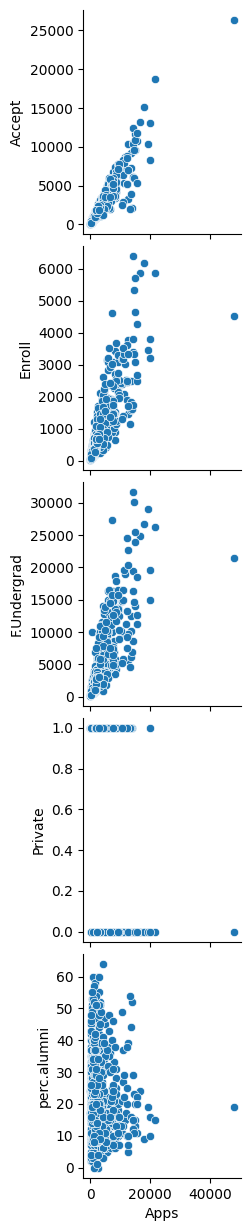

In [14]:
# The 'pairplot' function of seaborn is used to plot pairwise relationships in a dataset.
# Each plot in the pairplot represents the relationship between two variables.
# This can be useful to understand the correlations between different variables in our dataset.

# In our case, we are interested in the relationships between the 'Apps' column and the 'Accept', 'Enroll', 'F.Undergrad', 'Private', and 'perc.alumni' columns.
# Therefore, we pass these column names as the 'y_vars' and 'x_vars' arguments to the 'pairplot' function.

# The 'y_vars' argument is a list of column names that will be plotted on the y-axis.
# The 'x_vars' argument is a list of column names that will be plotted on the x-axis.
# Therefore, 'y_vars=['Accept', 'Enroll', 'F.Undergrad', 'Private', 'perc.alumni']' and 'x_vars=['Apps']' means that we will have scatterplots of 'Apps' vs. 'Accept', 'Apps' vs. 'Enroll', 'Apps' vs. 'F.Undergrad', 'Apps' vs. 'Private', and 'Apps' vs. 'perc.alumni'.

# We pass our DataFrame (df) as the first argument to the 'pairplot' function.
# This is the dataset to be plotted.

# The following line of code creates the pairplot:

sns.pairplot(df, y_vars=['Accept', 'Enroll', 'F.Undergrad', 'Private', 'perc.alumni'], x_vars=['Apps'])  # Expected return type: seaborn.axisgrid.PairGrid

# The result is a pairplot where each scatterplot represents the relationship between 'Apps' and one of 'Accept', 'Enroll', 'F.Undergrad', 'Private', and 'perc.alumni'.
# The scatterplots are arranged in a grid for easy comparison.

## Exploratory Data Analysis: Histograms of all Numerical Columns

To create histograms of all numerical columns, we can use the pandas `hist()` function which interfaces with matplotlib to generate histograms, and PyTorch to convert data into tensors.

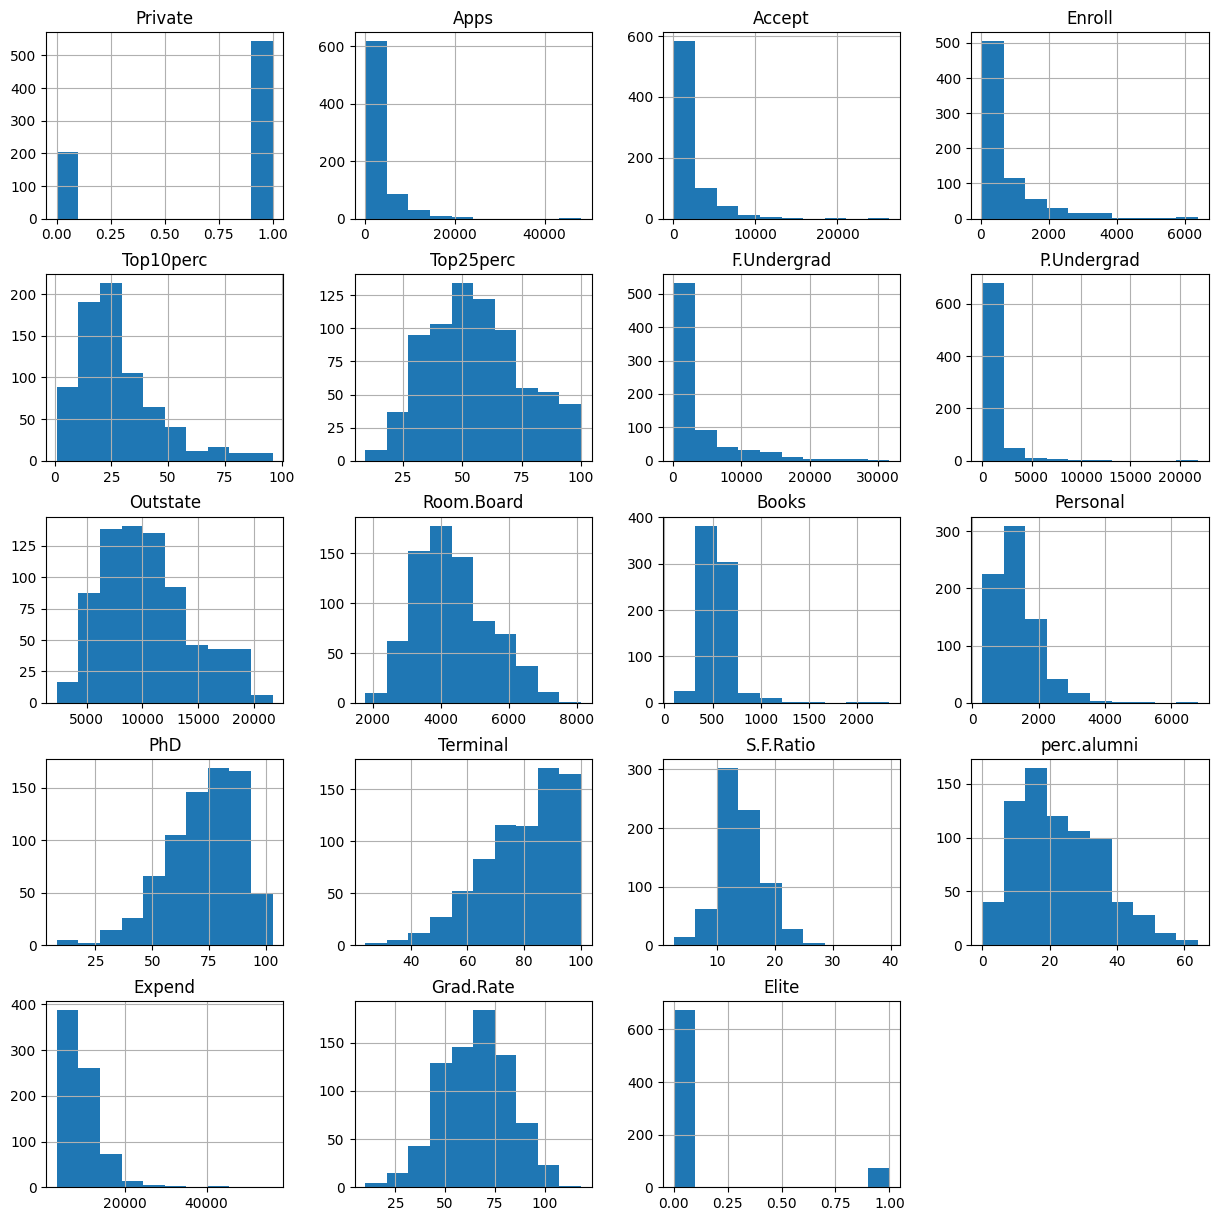

In [15]:
# Now, we want to create histograms of all numerical columns in our DataFrame.
# A histogram is a graphical representation of the distribution of a dataset.
# It is an estimate of the probability distribution of a continuous variable.
# To construct a histogram, the first step is to "bin" the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.
# The bins are usually specified as consecutive, non-overlapping intervals of a variable.
# The bins (intervals) must be adjacent and are often (but not necessarily) of equal size.

# We use the 'hist' function of pandas DataFrame to create the histograms.
# The 'hist' function generates histograms for all numerical columns in the DataFrame.
# It uses matplotlib under the hood to generate the histograms.

# The 'hist' function takes as input the figure size, which is a tuple representing the width and height of the figure in inches.
# We want our figure to be 15x15 inches, so we pass (15,15) as the argument.
# Therefore, 'df.hist(figsize=(15, 15))' creates histograms of all numerical columns and displays them on a 15x15 inches figure.

df.hist(figsize=(15, 15));  # Expected return type: numpy.ndarray

# The output will be a 2D numpy array where each element represents a histogram of a numerical column.
# Each histogram shows the distribution of values in the corresponding column.
# This helps us understand the distribution of values in each numerical column, which can be useful for further data analysis and modeling.

## EDA: Boxplots

Boxplots are a standardized way of displaying the distribution of data based on a five-number summary ('minimum', first quartile (Q1), median, third quartile (Q3), and 'maximum'). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

In the following, we will create two boxplots, one for our target variable `Apps` and one for our strongest predictor `Accept`.

<Axes: ylabel='Apps'>

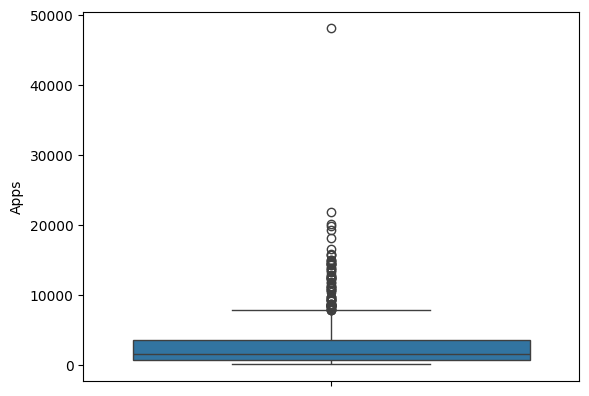

In [16]:
# We are now creating a boxplot for the 'Apps' column in our DataFrame.
# A boxplot (also known as a whisker plot) displays a summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum.
# In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median.
# Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.

# We use the 'boxplot' function from the seaborn library to create the boxplot.
# The 'boxplot' function takes as input the data to be plotted, which is the 'Apps' column in our DataFrame.
# Therefore, 'sns.boxplot(df['Apps'])' creates a boxplot of the 'Apps' column and displays it.

# The output will be a boxplot where the x-axis is the 'Apps' column and the y-axis is the frequency distribution.
# The box represents the interquartile range (i.e., from first quartile to third quartile), the line inside the box represents the median, and the whiskers represent the minimum and maximum.
# This gives us a visual representation of the distribution of the 'Apps' column.

sns.boxplot(df['Apps'])  # Expected return type: matplotlib.axes._subplots.AxesSubplot

<Axes: ylabel='Accept'>

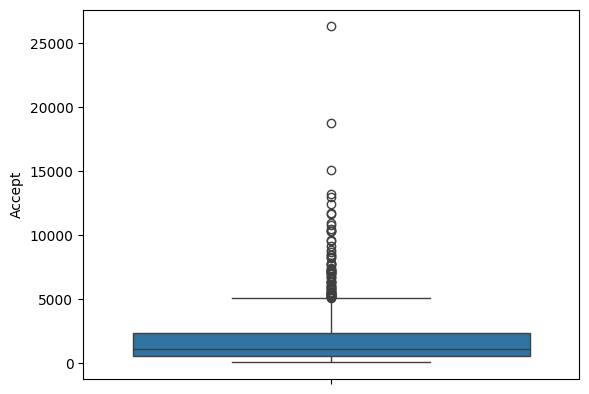

In [17]:
# Now, let's create a boxplot for the 'Accept' column in our DataFrame.
# The 'Accept' column represents the number of student applications that were accepted.
# This will give us a visual representation of the distribution of the 'Accept' column.

# We use the 'boxplot' function from the seaborn library to create the boxplot.
# The 'boxplot' function takes as input the data to be plotted.
# Therefore, 'sns.boxplot(df['Accept'])' creates a boxplot of the 'Accept' column.

# The output will be a boxplot where the x-axis represents the 'Accept' column and the y-axis represents the frequency distribution.
# The box in the boxplot represents the interquartile range (i.e., from the first quartile to the third quartile), the line inside the box represents the median, and the whiskers represent the minimum and maximum.
# This gives us a visual representation of the distribution of the 'Accept' column.
# It helps us understand the spread of accepted applications, the median number of accepted applications, and any potential outliers in the data.

sns.boxplot(df['Accept'])  # Expected return type: matplotlib.axes._subplots.AxesSubplot

## **Model Preparation: Create our features matrix (`X`) and target vector (`y`)**

To create our features matrix (`X`) and target vector (`y`), we first need to identify our numerical columns and our target column. In our dataset, the numerical columns are our features and the `Apps` column is our target (since it represents the number of applications received by each university).

In [18]:
# Creating a list of feature column names. The features are our independent variables or predictors.
# We would like to include all numerical columns in our DataFrame as features, except for the 'Apps' column because 'Apps' is our target variable.

# To get all numerical columns, we use the '_get_numeric_data' method of the DataFrame, which returns a DataFrame with only the numerical columns.
# We then access the 'columns' attribute of this DataFrame, which is an Index object (similar to a list) of the column names.
# Therefore, 'df._get_numeric_data().columns' is an Index object with all numerical column names.

# We want to exclude the 'Apps' column from this Index object.
# To do this, we use a list comprehension, which is a compact way of creating a list by iterating over an iterable and potentially including a condition.
# In our case, the iterable is 'df._get_numeric_data().columns', and the condition is 'col != 'Apps''.
# The variable 'col' takes on each value in the iterable one by one, and if 'col' is not equal to 'Apps', 'col' is included in the new list.
# Therefore, '[col for col in df._get_numeric_data().columns if col != 'Apps']' is a list of all numerical column names except for 'Apps'.

# We assign this list to the variable 'features', which will be used to create our features matrix.

features = [col for col in df._get_numeric_data().columns if col != 'Apps']  # Expected return type: list

# Finally, we print the 'features' list to verify that it contains the correct column names.

print(features)  # Expected return type: None

['Private', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate', 'Elite']


In [19]:
# Now that we have identified our features and target, we can create our features matrix `X` and target vector `y`.

# `X` is typically used to denote the matrix of feature variables (independent variables) in machine learning, and `y` is typically used to denote the vector of the target variable (dependent variable).

# To create `X`, we select the columns in `df` that are in the `features` list.
# We do this by passing the `features` list to the DataFrame (df) as an index.
# Therefore, `df[features]` is a DataFrame that contains only the columns in the `features` list.
# We assign this DataFrame to `X`, thus creating our features matrix.

X = df[features]  # Expected return type: pandas.DataFrame

# To create `y`, we select the 'Apps' column from the DataFrame.
# We do this by passing 'Apps' as an index to the DataFrame (df).
# Therefore, `df['Apps']` is a pandas Series that contains the values in the 'Apps' column.
# We assign this Series to `y`, thus creating our target vector.

y = df['Apps']  # Expected return type: pandas.Series

# Now, our features matrix `X` and target vector `y` are ready to be used for machine learning.

## Model Preparation: Scaling

Before we proceed with the model training, it's important to scale our features. Feature scaling is a method used to normalize the range of independent variables or features of data. This is generally performed during the data preprocessing step.

In our context, we'll use the `StandardScaler` to perform this task. The `StandardScaler` standardizes features by removing the mean and scaling to unit variance. This is often a necessary step because many machine learning algorithms do not perform as well if the features are not on relatively similar scales.

In [20]:
# Now we will standardize our feature matrix 'X'. Standardization of a dataset is a common requirement for many machine learning estimators.
# They might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.
# For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order.
# If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

# We use the StandardScaler class from sklearn's preprocessing module for this purpose.
# StandardScaler standardizes features by removing the mean and scaling to unit variance.
# The standard score of a sample x is calculated as: z = (x - u) / s
# Where u is the mean of the training samples, and s is the standard deviation of the training samples.

# Instantiate the StandardScaler.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Fit and transform our feature matrix 'X'.
# The 'fit' method computes the mean and standard deviation based on the feature matrix 'X'.
# The 'transform' method standardizes the feature matrix 'X' using the computed mean and standard deviation.
# Therefore, 'ss.fit_transform(X)' returns a new feature matrix that is a standardized version of 'X'.
X = ss.fit_transform(X)  # Expected return type: numpy.ndarray

# Now our feature matrix 'X' is standardized and ready to be used for machine learning.

## Model Preparation: Train/Test Split

It's vital to establish a holdout set for testing our model. This holdout set, or "test set", is a subset of our data that the model doesn't see during training, and we use it to evaluate the model's performance. This helps ensure our model's ability to generalize well to new, unseen data.

In total, we'll carry out the split twice. The first split will reserve 10% of the data for testing. For the remaining data, a second split will further break it down into 70% for training and 30% for validation.

In [21]:
from sklearn.model_selection import train_test_split

# We use the 'train_test_split' function from sklearn's model_selection module to split our data into training and testing sets.
# The 'train_test_split' function shuffles the dataset and then splits it into two parts.
# The first argument to the function is our features matrix `X`, and the second argument is our target vector `y`.
# The 'test_size' argument specifies the proportion of the dataset to include in the test split. We set it to 0.1, meaning 10% of the data will be reserved for testing.
# The 'shuffle' argument specifies whether or not to shuffle the data before splitting. We set it to True to ensure that our data is randomly split.
# The 'random_state' argument is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices. We set it to 42 for reproducibility of results.
X_OTHER, X_test, y_OTHER, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.1, 
                                                    shuffle = True, 
                                                    random_state=42)

# We then split the remaining data (X_OTHER, y_OTHER) into a training set and a validation set.
# The 'train_test_split' function is used again with the same arguments as before, except 'test_size' is now set to 0.3, meaning 30% of the remaining data will be used for validation.
# This leaves us with 70% of the remaining data for training.
X_train, X_val, y_train, y_val = train_test_split(X_OTHER, 
                                                  y_OTHER, 
                                                  test_size = 0.3, 
                                                  shuffle = True, 
                                                  random_state=42)

## **Train a Simple Linear Regression Model using PyTorch**

In [22]:
# We import the necessary libraries. pandas is used for data manipulation,
# numpy is used for numerical operations, and torch is used for building the machine learning model.
import numpy as np
import torch

# Set the device we are using. This could be a GPU ("cuda"), MPS ("mps") or a CPU ("cpu")
device = torch.device("cuda" if torch.cuda.is_available() else \
                      "mps" if torch.backends.mps.is_available() else \
                      "cpu")

# Convert the target and features into PyTorch tensors and move them to the device
y_train = torch.tensor(y_train.values).float().to(device)
y_train = y_train.view(y_train.shape[0], 1)
X_train = torch.tensor(X_train).float().to(device)

# Define the model as a linear regression model with one input and one output.
# The model is moved to the device.
model = torch.nn.Linear(in_features = X_train.shape[1], out_features = 1).to(device)

# Define the loss function as mean absolute error (MAE)
loss_function = torch.nn.L1Loss()

# Define the optimizer as Adaptive Moment Estimation (Adam) with a learning rate of 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1)

# Prepare the validation set
y_val = torch.tensor(y_val.values).float().to(device)
y_val = y_val.view(y_val.shape[0], 1)
X_val = torch.tensor(X_val).float().to(device)

best_vloss = float('inf')

# Train the model for 80,000 epochs
for epoch in range(80_000):
    # Calculate the predictions for the current model
    y_pred_train = model(X_train)

    # Calculate the loss between the predictions and the true values
    loss = loss_function(y_pred_train, y_train)

    # Print the loss every 1000 epochs
    if epoch % 1_000 == 0:
        print(f'Epoch {epoch}, Training Loss {loss.item()}')

    # Calculate the gradients
    loss.backward()

    # Update the weights
    optimizer.step()

    # Reset the gradients
    optimizer.zero_grad()

    # Validation
    with torch.no_grad():
        y_pred_val = model(X_val)
        vloss = loss_function(y_pred_val, y_val)
        if epoch % 1_000 == 0:
            print(f'Epoch {epoch}, Validation Loss {vloss.item()}')

        # Track best performance, and save the model's state
        if vloss < best_vloss:
            best_vloss = vloss
            torch.save(model.state_dict(), 'best_model.pth')

# Print the final loss and the model parameters
print(f'\nFinal loss: {loss.item()}')
print(f'Beta coefficients (weights): {model.weight}')
print(f'Bias: {model.bias.item()}')

Epoch 0, Training Loss 2999.707275390625
Epoch 0, Validation Loss 2745.1923828125
Epoch 1000, Training Loss 2870.203369140625
Epoch 1000, Validation Loss 2697.443115234375
Epoch 2000, Training Loss 2744.872802734375
Epoch 2000, Validation Loss 2641.68505859375
Epoch 3000, Training Loss 2624.203125
Epoch 3000, Validation Loss 2590.6376953125
Epoch 4000, Training Loss 2504.642333984375
Epoch 4000, Validation Loss 2536.993896484375
Epoch 5000, Training Loss 2390.033447265625
Epoch 5000, Validation Loss 2464.950927734375
Epoch 6000, Training Loss 2278.665771484375
Epoch 6000, Validation Loss 2391.0615234375
Epoch 7000, Training Loss 2173.2294921875
Epoch 7000, Validation Loss 2323.478515625
Epoch 8000, Training Loss 2072.15087890625
Epoch 8000, Validation Loss 2248.04736328125
Epoch 9000, Training Loss 1974.0306396484375
Epoch 9000, Validation Loss 2155.062255859375
Epoch 10000, Training Loss 1878.4652099609375
Epoch 10000, Validation Loss 2055.41015625
Epoch 11000, Training Loss 1783.9042

In [23]:
model.load_state_dict(torch.load('./best_model.pth'))
model.eval()

# Move model and input data to CPU and calculate the final predictions
predictions = model.cpu()(X_val.cpu()).detach().numpy()

## Compute Metrics

In [24]:
# Define a function to compute all the metrics
def compute_metrics(y_actual, y_pred, n, p):

    # Convert the actual and predicted values to tensors
    y_actual = torch.tensor(y_actual).float()
    y_pred = torch.tensor(y_pred).float()

    # Define the loss functions
    loss_function_mae = torch.nn.L1Loss()
    loss_function_mse = torch.nn.MSELoss()

    # Compute Mean Absolute Error
    mae = loss_function_mae(y_pred, y_actual)
    print(f'Mean Absolute Error: {mae.item()}')

    # Compute Mean Squared Error
    mse = loss_function_mse(y_pred, y_actual)
    print(f'Mean Squared Error: {mse.item()}')

    # Compute Root Mean Squared Error
    rmse = torch.sqrt(mse)
    print(f'Root Mean Squared Error: {rmse.item()}')

    # Compute the Residual Sum of Squares
    residuals = y_actual - y_pred
    rss = torch.sum(residuals**2)
    print(f'Residual Sum of Squares: {rss.item()}')

    # Compute the total sum of squares
    tss = torch.sum((y_actual - torch.mean(y_actual))**2)

    # Compute R-squared
    r_squared = 1 - (rss / tss)
    print(f'R-Squared: {r_squared.item()}')

    # Compute Adjusted R-squared
    adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
    print(f'Adjusted R-Squared: {adjusted_r_squared.item()}')

In [25]:
# Call the function with the actual and predicted values, number of observations (n), and number of predictors (p)
compute_metrics(y_val.cpu(), predictions, y_val.shape[0], X_val.shape[1]) # Change the number of predictors accordingly

Mean Absolute Error: 469.6294860839844
Mean Squared Error: 1438104.875
Root Mean Squared Error: 1199.2100830078125
Residual Sum of Squares: 290497184.0
R-Squared: 0.8766577839851379
Adjusted R-Squared: 0.8645257949829102


/var/folders/ng/r2tzgry96c3cm_rbns2hw5jr0000gn/T/ipykernel_58091/3292100796.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_actual = torch.tensor(y_actual).float()


## Predict the Values for the Test Dataset

In [26]:
# Move model and input data to CPU and calculate the final predictions
y_pred = model.cpu()(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()

# Call the function with the actual and predicted values, number of observations (n), and number of predictors (p)
compute_metrics(y_test.values, y_pred, y_test.shape[0], X_test.shape[1]) # Change the number of predictors accordingly

Mean Absolute Error: 3641.8681640625
Mean Squared Error: 59304908.0
Root Mean Squared Error: 7700.9677734375
Residual Sum of Squares: 333590102016.0
R-Squared: -115.83786010742188
Adjusted R-Squared: -153.39288330078125


/Users/amir/anaconda3/envs/aia/lib/python3.10/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([75])) that is different to the input size (torch.Size([75, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/Users/amir/anaconda3/envs/aia/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([75])) that is different to the input size (torch.Size([75, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


The metrics for the validation and test datasets are indeed quite different. On the validation set, the model performs relatively well with an Adjusted R-squared of about 0.865, meaning the model explains approximately 86.5% of the variability in the target variable that can be explained by the features. The Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are also reasonably low.

However, on the test set, the model's performance significantly drops. The Adjusted R-squared is a large negative value, which suggests that the model performs worse than a horizontal line (i.e., a very naive model). This implies that the model doesn't generalize well to unseen data. The MAE, MSE, and RMSE are also much higher for the test set, further supporting the conclusion that the model's performance on the test set is poor.

If the Adjusted R-squared is lower for the test set, it means that the model does not generalize well to new, unseen data. This could be due to overfitting during training, where the model learns the training data too well, including its noise and outliers, leading to poor performance on new data.

On the other hand, if the Adjusted R-squared were higher for the test set, it would indicate that the model generalizes well from the training data to unseen data, and that it probably has not overfitted the training data.